In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_excel("online_retail.xlsx")
print(df.head())
print(df.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

In [3]:
# data cleaning - missing values
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()} missing values")

InvoiceNo: 0 missing values
StockCode: 0 missing values
Description: 1454 missing values
Quantity: 0 missing values
InvoiceDate: 0 missing values
UnitPrice: 0 missing values
CustomerID: 135080 missing values
Country: 0 missing values


CustomerID and Description are the only two variables with missing values

In [4]:
# closer look at CustomerID missing values
number_missing = df["CustomerID"].isnull().sum()
total = len(df)
print(f"Total number of records : {total}")
percentage_missing = (number_missing / total) * 100
print(f"Percentage of missing CustomerID : {percentage_missing:.2f}%")

Total number of records : 541909
Percentage of missing CustomerID : 24.93%


24.93% of the values in CustomerID are missing. Further analysis on customer's behaviour would be difficult without their own customer ID, therefore the missing values are going to be removed. 

In [5]:
# deleting missing values in CustomerID
df = df.dropna(subset=['CustomerID'])
print(df.info())
print(df.head())
print(f"New total number of records : {len(df)}")

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029

In [6]:
# checking for other missing values
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()} missing values")

InvoiceNo: 0 missing values
StockCode: 0 missing values
Description: 0 missing values
Quantity: 0 missing values
InvoiceDate: 0 missing values
UnitPrice: 0 missing values
CustomerID: 0 missing values
Country: 0 missing values


No other missing values in the dataset. Now, Description does not have any missing values. 

In [ ]:
# unique features in the variables 
for col in df.columns:
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values} unique values")

for col in df.columns:
    unique_values = df[col].unique()
    print(f"{col} unique values: {unique_values[:5]}...")  # displaying only first 5 unique values

InvoiceNo: 22190 unique values
StockCode: 3684 unique values
Description: 3896 unique values
Quantity: 436 unique values
InvoiceDate: 20460 unique values
UnitPrice: 620 unique values
CustomerID: 4372 unique values
Country: 37 unique values
InvoiceNo unique values: [536365 536366 536367 536368 536369]...
StockCode unique values: ['85123A' 71053 '84406B' '84029G' '84029E']...
Description unique values: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.']...
Quantity unique values: [ 6  8  2 32  3]...
InvoiceDate unique values: <DatetimeArray>
['2010-12-01 08:26:00', '2010-12-01 08:28:00', '2010-12-01 08:34:00',
 '2010-12-01 08:35:00', '2010-12-01 08:45:00']
Length: 5, dtype: datetime64[ns]...
UnitPrice unique values: [2.55 3.39 2.75 7.65 4.25]...
CustomerID unique values: [17850. 13047. 12583. 13748. 15100.]...
Country unique values: ['United Kingdom' 'France' 'Australia' 'Ne

From that, a variety of customers and therefore a variety of purchasing behaviour. 

In [8]:
# checking duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

Number of duplicate records: 5225


In [9]:
# removing duplicates
df = df.drop_duplicates()
print(f"New total number of records after removing duplicates: {len(df)}")

New total number of records after removing duplicates: 401604


In [10]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [11]:
# checking for negative quantities
negative_quantities = df[df['Quantity'] < 0]
print(f"Number of negative quantities : {len(negative_quantities)}")

Number of negative quantities : 8872


Negative quantities refer to returns made by customers.

In [12]:
# checking for positive quantites, in opposition to negative quantities
positive_quantities = df[df['Quantity'] > 0]
print(f"Number of positive quantities : {len(positive_quantities)}")

Number of positive quantities : 392732


In [13]:
# ratio of positive to negative quantities
ratio = len(positive_quantities) / len(negative_quantities)
print(f"Ratio of positive to negative quantities: {ratio:.2f}%")

Ratio of positive to negative quantities: 44.27%


The number of positive quantities (purchase) outweighs the total number of negative quantities (returns).

In [14]:
# countries in the dataset
print(df["Country"].unique())

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [ ]:
# gathering the countries by continent - new variable Continent
if "Continent" not in df.columns:
    country_to_continent = {
        "United Kingdom": "Europe",
        "France": "Europe",
        "Australia": "Oceania",
        "Netherlands": "Europe",
        "Germany": "Europe",
        "Norway": "Europe",
        "EIRE": "Europe",
        "Switzerland": "Europe",
        "Spain": "Europe",
        "Poland": "Europe",
        "Portugal": "Europe",
        "Italy": "Europe",
        "Belgium": "Europe",
        "Lithuania": "Europe",
        "Japan": "Asia",
        "Iceland": "Europe",
        "Channel Islands": "Europe",
        "Denmark": "Europe",
        "Cyprus": "Europe",
        "Sweden": "Europe",
        "Austria": "Europe",
        "Israel": "Asia",
        "Finland": "Europe",
        "Greece": "Europe",
        "Singapore": "Asia",
        "Lebanon": "Asia",
        "United Arab Emirates": "Asia",
        "Saudi Arabia": "Asia",
        "Czech Republic": "Europe",
        "Canada": "North America",
        "Unspecified": "Other", 
        "Brazil": "South America",
        "USA": "North America",
        "European Community": "Europe", 
        "Bahrain": "Asia",
        "Malta": "Europe",
        "RSA": "Africa"
    }
    
    df['Continent'] = df['Country'].map(country_to_continent).fillna('Other')

In [16]:
# checking for continents
for continent in df["Continent"].unique():
    count = len(df[df["Continent"] == continent])
    print(f"{continent}: {count} records")

Europe: 398599 records
Oceania: 1258 records
Asia: 974 records
North America: 442 records
Other: 241 records
South America: 32 records
Africa: 58 records


Associating each country with its continent will allow us an analysis per continent. 

In [22]:
# total sales - new variable TotalSales
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]
print(df["TotalSales"].head()) # unit : sterling
print(df.info())

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: TotalSales, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   Continent    401604 non-null  object        
 9   TotalSales   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 33.7+ MB
None


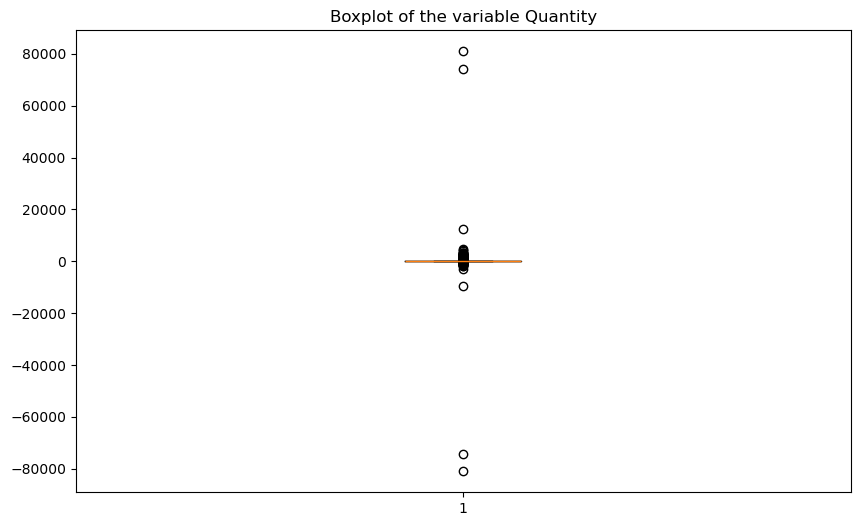

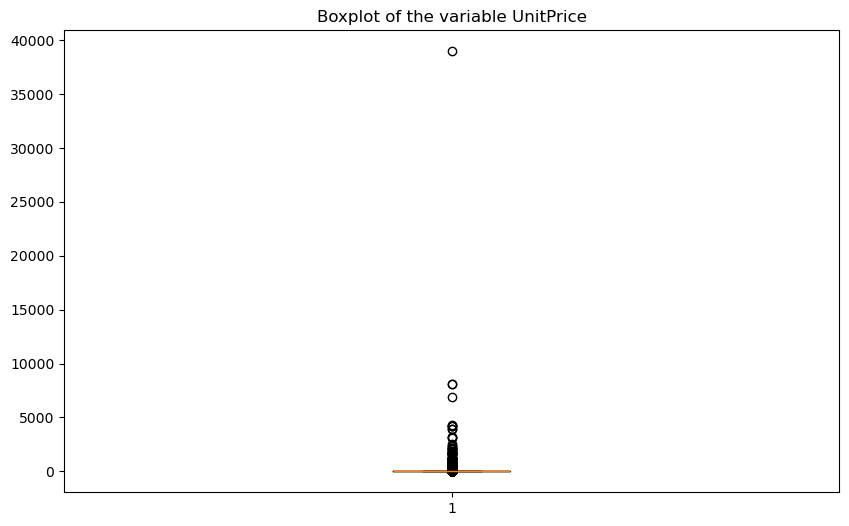

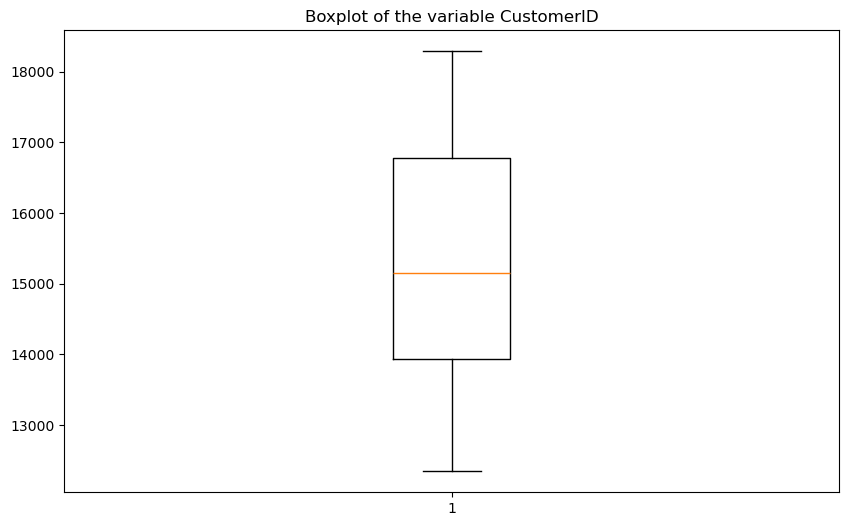

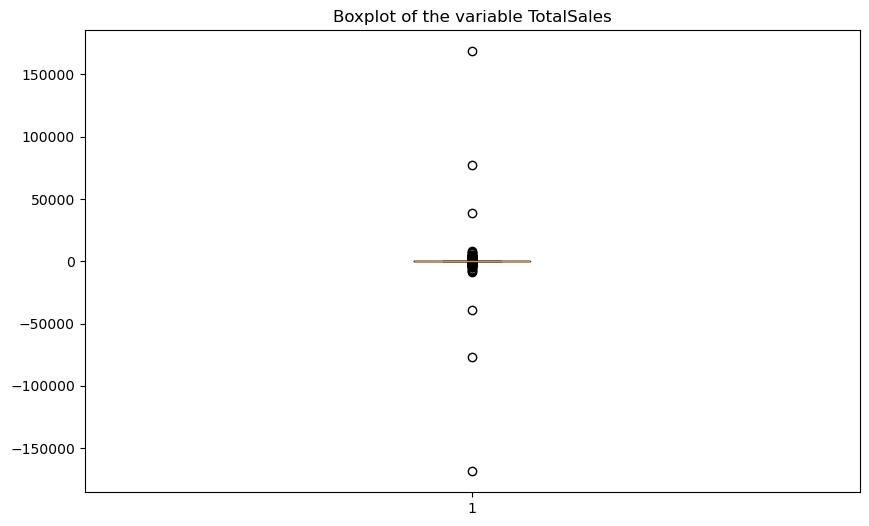

In [ ]:
# checking for outliers - general
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]: 
        plt.figure(figsize = (10, 6))
        plt.boxplot(df[col])
        plt.title(f"Boxplot of the variable {col}")

In [ ]:
# outliers - UnitPrice
print(df["UnitPrice"].describe())
print(df[df["UnitPrice"] == 0]) # preview
print(f"Number of items with a price equal to 0 : {len(df[df['UnitPrice'] == 0])}")

count    401604.000000
mean          3.474064
std          69.764035
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64
       InvoiceNo StockCode                          Description  Quantity  \
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    5488

Having a price equal to 0 is not common in e-commerce. These prices of 0 must refer to a promotion or a sample given for free. Since there are only 40 customers who received items given for free, those will be removed from the dataset. 

In [56]:
# removing prices = 0
df = df[df["UnitPrice"] != 0]
print(f"New number of records after removing prices = 0 : {len(df)}")

New number of records after removing prices = 0 : 401564


In [ ]:
# extreme prices - UnitPrice > 3.75
print(df["UnitPrice"].describe())
print(len(df[df["UnitPrice"] > 3.75]))
print(len(df)) # 22% of the prices are greater than 3.75
##################################################################


count    401564.000000
mean          3.474410
std          69.767501
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64
88862
401564
